#SQL_CAPSTONE_PROJECT_Odinschool
#Installing pymysql and importing pymysql,numpy,pandas ,matplotlib and seaborn

#Installing pymysql and importing pymysql,numpy,pandas ,matplotlib and seaborn

In [4]:
pip install pymysql

In [5]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Database Connection :
connecting jypyter notebook with mysql by giving local host id,username,password of mysql, and giving database name to retrieve data from this database
Here we are using amazon dataset which was created in mysql workbench.

In [6]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='mysql',
                             database='amazondb')

Data Exploration:¶
Retriving all the rows in all columns from amazon table which is present in the amazondb dataset

In [7]:
query="select * from amazon"
df=pd.read_sql(query,connection)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,timeofday,dayname,monthname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Afternoon,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Afternoon,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Afternoon,Friday,February


In [12]:
#Count distinct product lines
query="SELECT COUNT(DISTINCT `product line`) AS distinct_product_lines FROM amazon"
df=pd.read_sql(query,connection)
df


,distinct_product_lines
0,6


In [164]:
#Determine the list of unique product lines available.
#List unique product lines*/
query="SELECT DISTINCT `product line` FROM amazon;"
df=pd.read_sql(query,connection)
df


,product line
0,Health and beauty
1,Electronic accessories
2,Home and lifestyle
3,Sports and travel
4,Food and beverages
5,Fashion accessories


             product line  total_sales
0      Food and beverages   56144.8440
1       Sports and travel   55122.8265
2  Electronic accessories   54337.5315
3     Fashion accessories   54305.8950
4      Home and lifestyle   53861.9130
5       Health and beauty   49193.7390


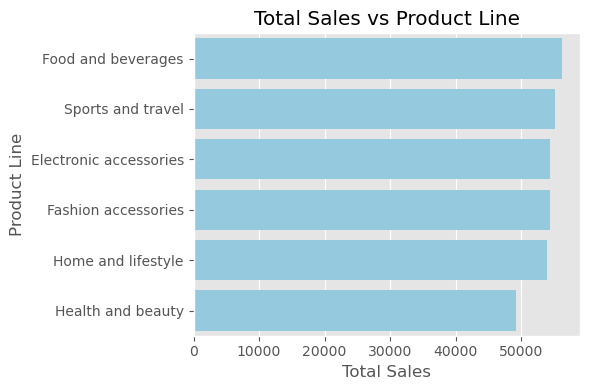

In [193]:
# Product Analysis
#Calculate total sales for each product line*/
query="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a horizontal bar plot
sns.barplot(x='total_sales', y='product line', data=df, color='skyblue')

plt.title("Total Sales vs Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")

plt.tight_layout()  
plt.show()

             product line  total_sales
0      Food and beverages   56144.8440
1       Sports and travel   55122.8265
2  Electronic accessories   54337.5315


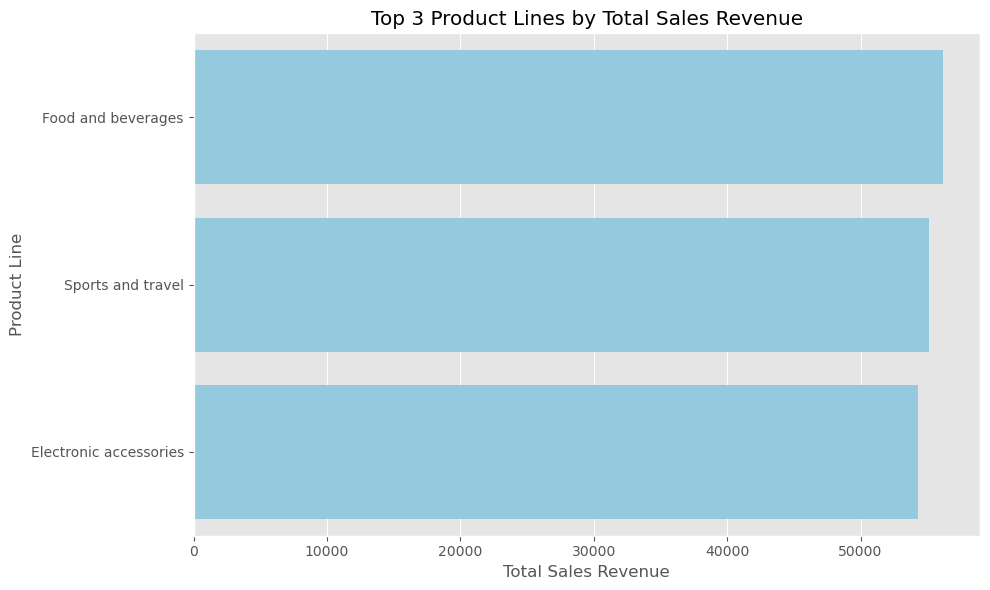

In [194]:
#Determine product lines with highest sales revenue*/
query="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC LIMIT 3; "
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(10, 6))  

plt.style.use('ggplot')

# Creating a horizontal bar plot
sns.barplot(x='total_sales', y='product line', data=df, color='skyblue')

plt.title("Top 3 Product Lines by Total Sales Revenue")
plt.xlabel("Total Sales Revenue")
plt.ylabel("Product Line")

plt.tight_layout()  
plt.show()

In [47]:
#Calculate average sales revenue for all product lines
query="SELECT  AVG(total) as average_sales FROM amazon;"
df=pd.read_sql(query,connection)
print(df)

   average_sales
0     322.966749


             product line  average_sales
0      Home and lifestyle     336.636956
1       Sports and travel     332.065220
2       Health and beauty     323.643020
3      Food and beverages     322.671517
4  Electronic accessories     319.632538
5     Fashion accessories     305.089298


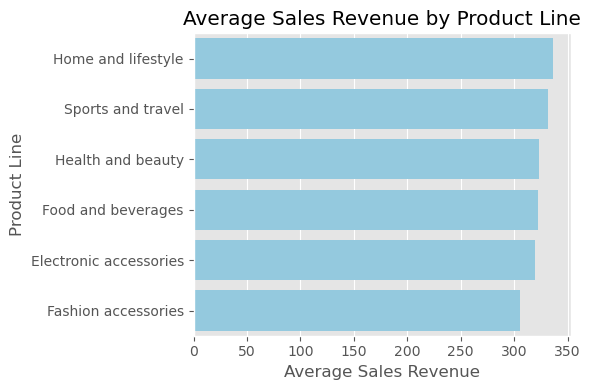

In [196]:
#Calculate average sales revenue for each product line
query="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` ORDER BY average_sales DESC; "
df=pd.read_sql(query,connection)
print(df)

plt.figure(figsize=(6, 4))  

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a horizontal bar plot
sns.barplot(x='average_sales', y='product line', data=df, color='skyblue')

plt.title("Average Sales Revenue by Product Line")
plt.xlabel("Average Sales Revenue")
plt.ylabel("Product Line")

plt.tight_layout()  
plt.show()


         product line  average_sales
0   Health and beauty     323.643020
1   Sports and travel     332.065220
2  Home and lifestyle     336.636956


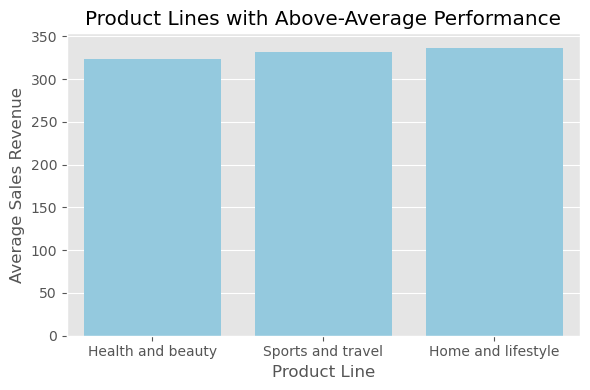

In [197]:
#Identify product lines with above-average performance*/
query="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` HAVING AVG(total) > (SELECT AVG(total) FROM amazon) order by average_sales;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a horizontal bar plot
sns.barplot(y='average_sales', x='product line', data=df, color='skyblue')

plt.title("Product Lines with Above-Average Performance")
plt.ylabel("Average Sales Revenue")
plt.xlabel("Product Line")

plt.tight_layout()  
plt.show()

             product line  average_sales
0      Food and beverages     322.671517
1  Electronic accessories     319.632538
2     Fashion accessories     305.089298


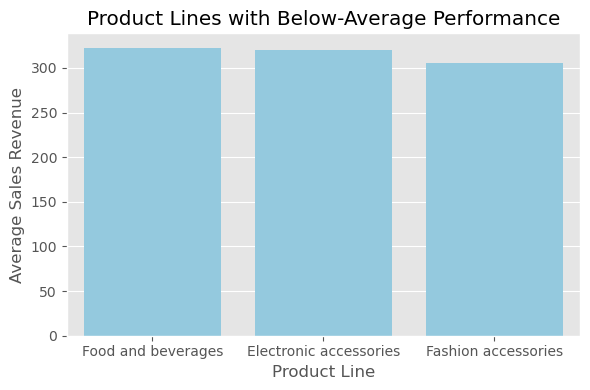

In [200]:
#Identify product lines with below-average performance*/
query="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` HAVING AVG(total) < (SELECT AVG(total) FROM amazon) order by average_sales desc;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4)) 

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a  bar plot
sns.barplot(y='average_sales', x='product line', data=df, color='skyblue')

plt.title("Product Lines with Below-Average Performance")
plt.ylabel("Average Sales Revenue")
plt.xlabel("Product Line")

plt.tight_layout()  
plt.show()

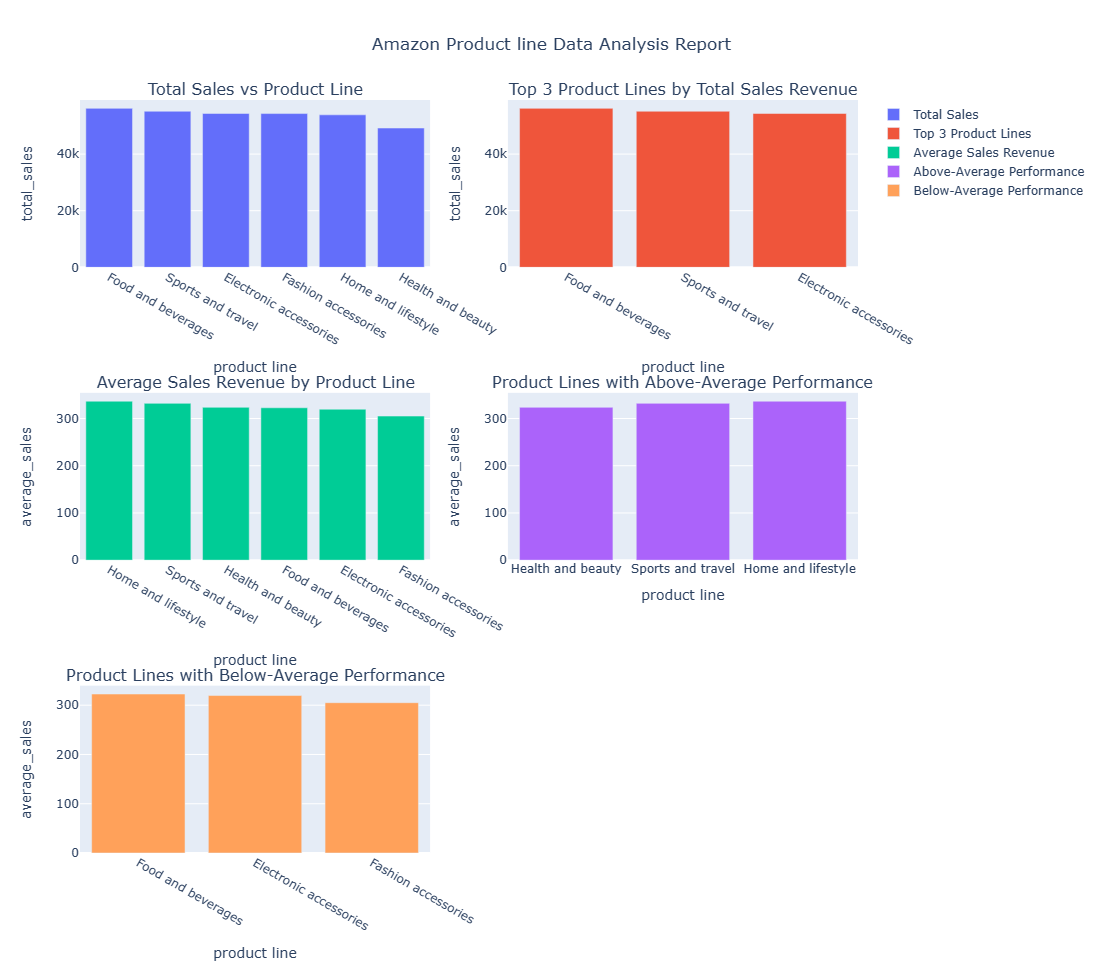

In [206]:
##Vidualizations by using plotly on Product line
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
# Define queries
q1="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC;"
q2="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC LIMIT 3;"
q3="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` ORDER BY average_sales DESC; "
q4="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` HAVING AVG(total) > (SELECT AVG(total) FROM amazon) order by average_sales; "
q5="SELECT `product line`, AVG(total) AS average_sales FROM amazon GROUP BY `product line` HAVING AVG(total) < (SELECT AVG(total) FROM amazon) order by average_sales desc;"
df1=pd.read_sql(q1,connection)
df2=pd.read_sql(q2,connection)
df3=pd.read_sql(q3,connection)
df4=pd.read_sql(q4,connection)
df5=pd.read_sql(q5,connection)

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Total Sales vs Product Line", "Top 3 Product Lines by Total Sales Revenue", 
                                                    "Average Sales Revenue by Product Line", "Product Lines with Above-Average Performance", 
                                                    "Product Lines with Below-Average Performance"))

# Bar Plot
bar_trace = go.Bar(x=df1['product line'].unique(), y=df1['total_sales'])
fig.add_trace(go.Bar(x=df1['product line'], y=df1['total_sales'], name="Total Sales "), row=1, col=1)
fig.update_xaxes(title_text="product line", row=1, col=1)
fig.update_yaxes(title_text="total_sales", row=1, col=1)

bar_trace = go.Bar(x=df2['product line'].unique(), y=df2['total_sales'])
fig.add_trace(go.Bar(x=df2['product line'], y=df2['total_sales'], name="Top 3 Product Lines "), row=1, col=2)
fig.update_xaxes(title_text="product line", row=1, col=2)
fig.update_yaxes(title_text="total_sales", row=1, col=2)

bar_trace = go.Bar(x=df3['product line'].unique(), y=df3['average_sales'])
fig.add_trace(go.Bar(x=df3['product line'], y=df3['average_sales'], name="Average Sales Revenue "), row=2, col=1)
fig.update_xaxes(title_text="product line", row=2, col=1)
fig.update_yaxes(title_text="average_sales", row=2, col=1)

bar_trace = go.Bar(x=df4['product line'].unique(), y=df4['average_sales'])
fig.add_trace(go.Bar(x=df4['product line'], y=df4['average_sales'], name="Above-Average Performance"), row=2, col=2)
fig.update_xaxes(title_text="product line", row=2, col=2)
fig.update_yaxes(title_text="average_sales", row=2, col=2)

bar_trace = go.Bar(x=df5['product line'].unique(), y=df5['average_sales'])
fig.add_trace(go.Bar(x=df5['product line'], y=df5['average_sales'], name="Below-Average Performance"), row=3, col=1)
fig.update_xaxes(title_text="product line", row=3, col=1)
fig.update_yaxes(title_text="average_sales", row=3, col=1)

# Update layout

fig.update_layout(title="Amazon Product line Data Analysis Report", title_x=0.5,height=970, width=1100)


# Show plot
fig.show()

          date  total_sales
0   2019-03-09    7474.0470
1   2019-02-07    7228.2105
2   2019-03-14    7214.6340
3   2019-02-15    6830.7855
4   2019-03-02    6560.3055
..         ...          ...
84  2019-02-18    1496.0295
85  2019-03-07    1438.2585
86  2019-02-21    1393.7385
87  2019-03-18    1292.8335
88  2019-02-13     934.2375

[89 rows x 2 columns]


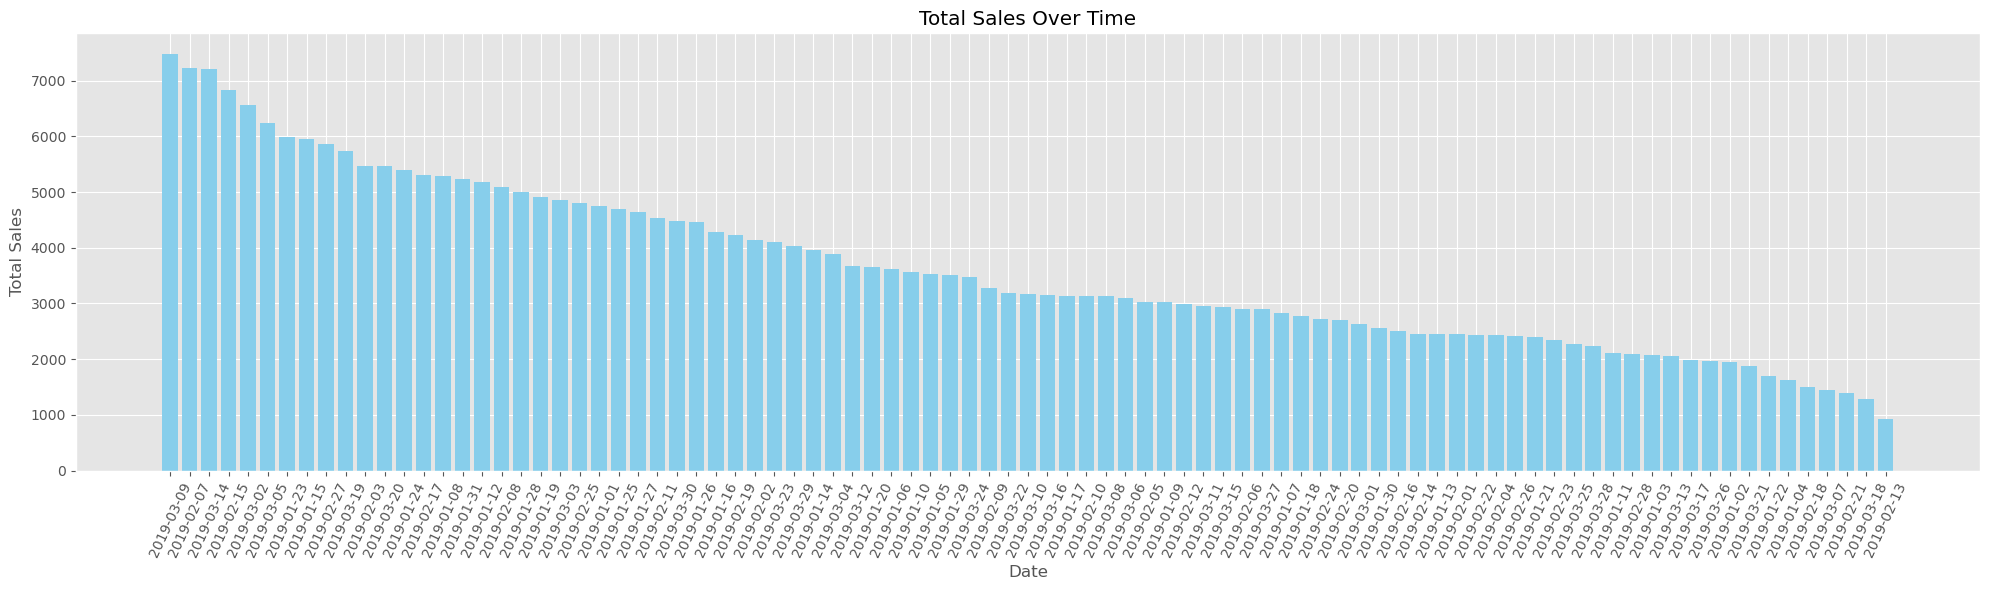

In [170]:
#Sales Analysis
query="SELECT date, SUM(total) AS total_sales FROM amazon GROUP BY date ORDER BY total_sales desc;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(20, 6))  

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a bar plot
plt.bar(df['date'], df['total_sales'], color='skyblue')

plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability

plt.tight_layout()  
plt.show()

             product line  total_sales
0      Food and beverages   56144.8440
1       Sports and travel   55122.8265
2  Electronic accessories   54337.5315
3     Fashion accessories   54305.8950
4      Home and lifestyle   53861.9130
5       Health and beauty   49193.7390


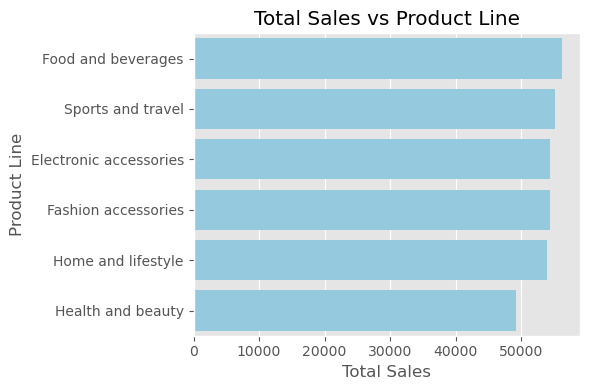

In [207]:
query="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  # Adjust figure size as needed

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a horizontal bar plot
sns.barplot(x='total_sales', y='product line', data=df, color='skyblue')

plt.title("Total Sales vs Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

  branch  total_sales
0      C  110568.7065
1      A  106200.3705
2      B  106197.6720


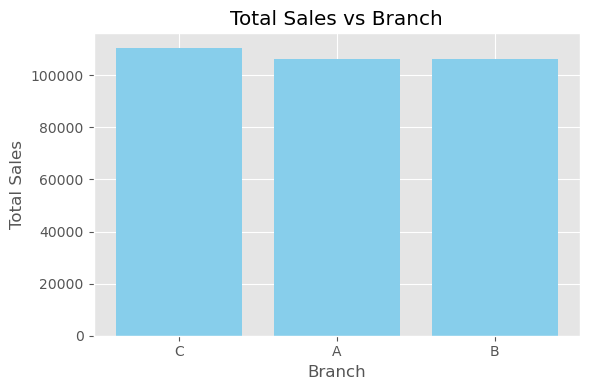

In [208]:
query="SELECT branch, SUM(total) AS total_sales FROM amazon GROUP BY branch ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  # Adjust figure size as needed

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a bar plot
plt.bar(df['branch'], df['total_sales'], color='skyblue')

plt.title("Total Sales vs Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

   total_sales monthname
0   116291.868   January
1   109455.507     March
2    97219.374  February


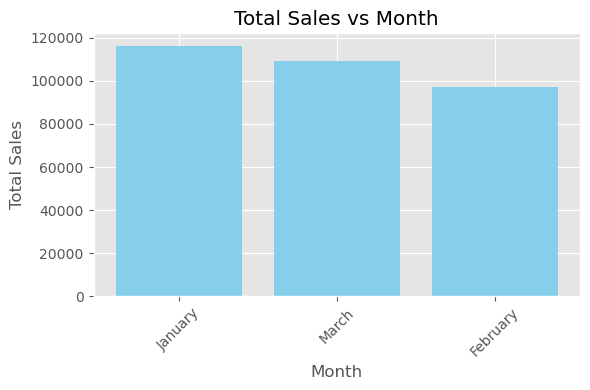

In [209]:
#Determine peak seasons or months with highest sales and off-peak seasons.*/
query="select sum(total) as total_sales,monthname from amazon group by monthname order by total_sales desc;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  # Adjust figure size as needed

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a bar plot
plt.bar(df['monthname'], df['total_sales'], color='skyblue')

plt.title("Total Sales vs Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

   highest_revenue       city
0      110568.7065  Naypyitaw
1      106200.3705     Yangon
2      106197.6720   Mandalay


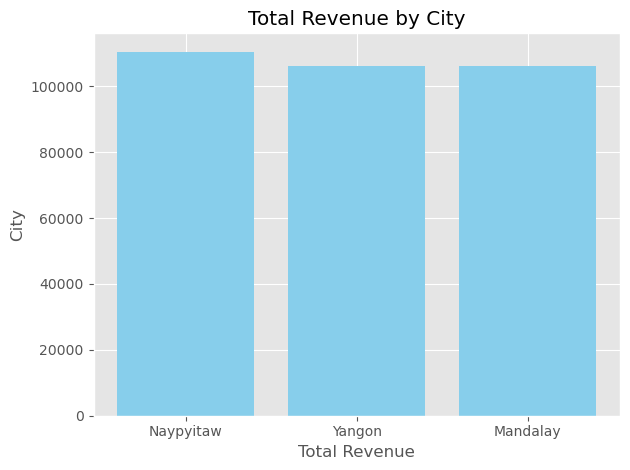

In [174]:
#identify In which city was the highest revenue recorded?
query="select sum(Total) as highest_revenue,city from amazon group by city order by highest_revenue desc;"
df=pd.read_sql(query,connection)
print(df)

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Plotting the total revenue for each city
plt.bar(df['city'], df['highest_revenue'], color='skyblue')

plt.title("Total Revenue by City")
plt.xlabel("Total Revenue")
plt.ylabel("City")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

  customer type  total_sales
0        Member   164223.444
1        Normal   158743.305


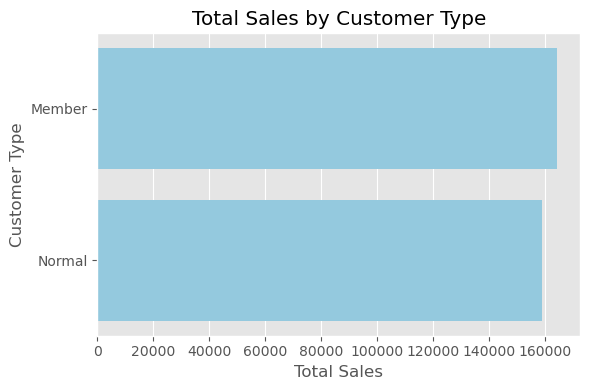

In [210]:
#Calculate total sales for each customer type to understand their contribution to overall sales.
query="SELECT `customer type`, SUM(total) AS total_sales FROM amazon GROUP BY `customer type` ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4))  

plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a bar plot for total sales by customer type
sns.barplot(x='total_sales', y='customer type', data=df, color='skyblue')

plt.title("Total Sales by Customer Type")
plt.xlabel("Total Sales")
plt.ylabel("Customer Type")

plt.tight_layout()  
plt.show()

       payment  total_sales
0         Cash   112206.570
1      Ewallet   109993.107
2  Credit card   100767.072


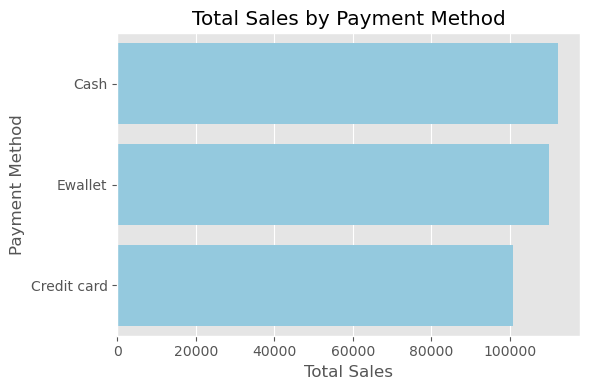

In [211]:
#Analyze trends in sales by payment method to identify popular payment methods.
#Calculate total sales for each payment method*/
query="SELECT payment, SUM(total) AS total_sales FROM amazon GROUP BY payment ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)
plt.figure(figsize=(6, 4)) 
plt.style.use('ggplot')
plt.grid(which="minor", linestyle="-.", color="skyblue")

# Creating a bar plot for total sales by payment method
sns.barplot(x='total_sales', y='payment', data=df, color='skyblue')

plt.title("Total Sales by Payment Method")
plt.xlabel("Total Sales")
plt.ylabel("Payment Method")

plt.tight_layout() 
plt.show()

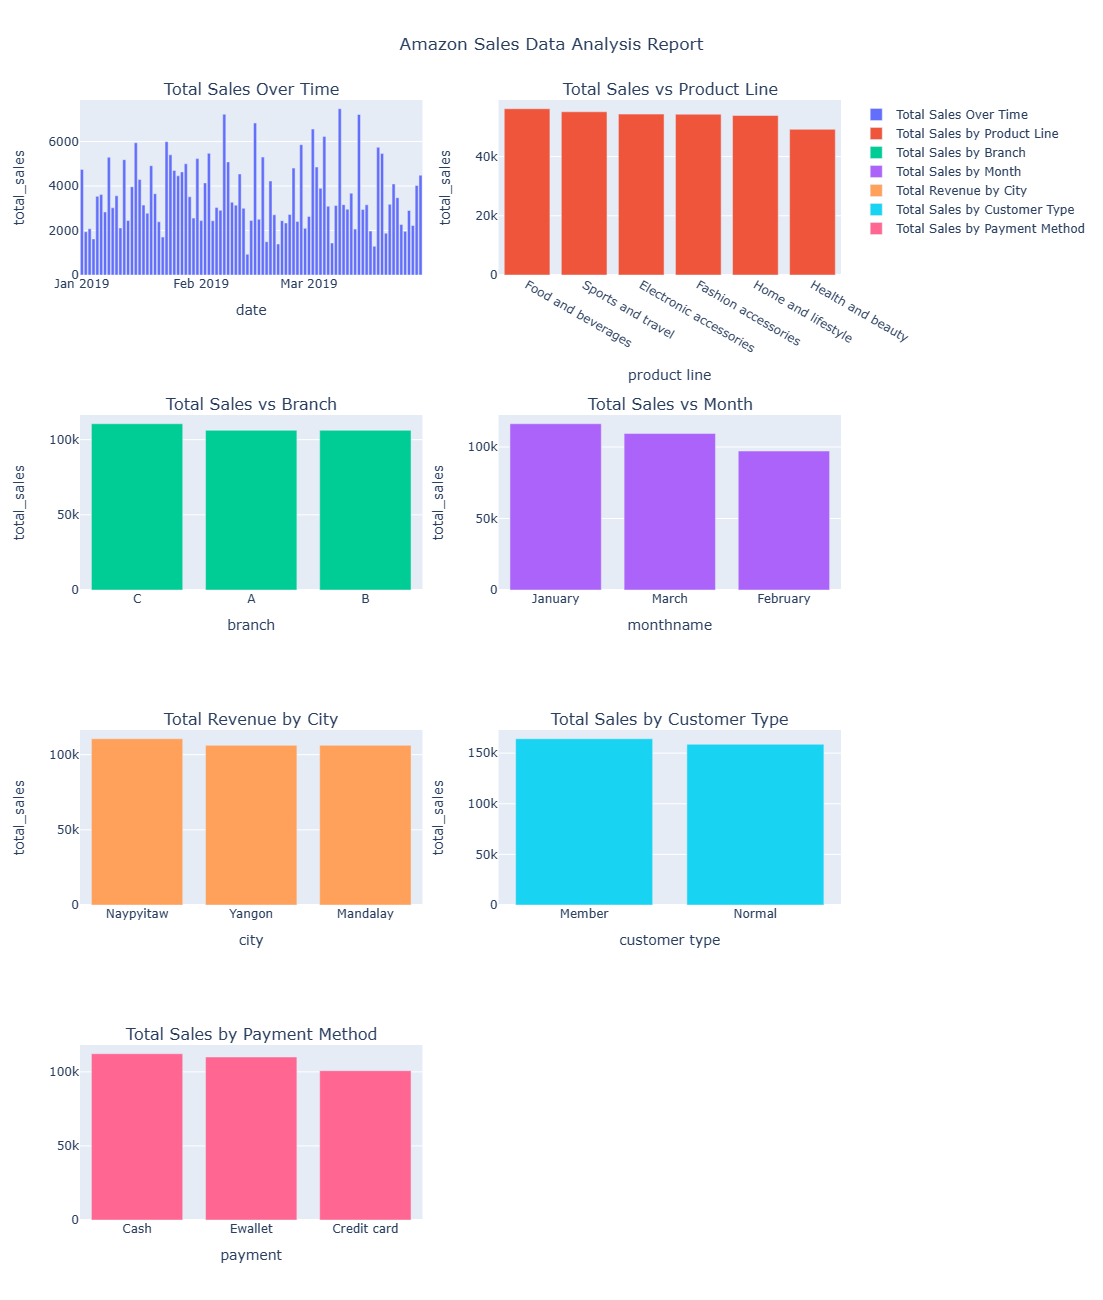

In [192]:
##Vidualizations by using plotly for Sales Analysis
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
# Define queries
q1="SELECT date, SUM(total) AS total_sales FROM amazon GROUP BY date ORDER BY date desc;"
q2="SELECT `product line`, SUM(total) AS total_sales FROM amazon GROUP BY `product line` ORDER BY total_sales DESC;"
q3="SELECT branch, SUM(total) AS total_sales FROM amazon GROUP BY branch ORDER BY total_sales DESC;"
q4="select sum(total) as total_sales,monthname from amazon group by monthname order by total_sales desc;"
q5="select sum(Total) as highest_revenue,city from amazon group by city order by highest_revenue desc;"
q6="SELECT `customer type`, SUM(total) AS total_sales FROM amazon GROUP BY `customer type` ORDER BY total_sales DESC;"
q7="SELECT payment, SUM(total) AS total_sales FROM amazon GROUP BY payment ORDER BY total_sales DESC;"
df1=pd.read_sql(q1,connection)
df2=pd.read_sql(q2,connection)
df3=pd.read_sql(q3,connection)
df4=pd.read_sql(q4,connection)
df5=pd.read_sql(q5,connection)
df6=pd.read_sql(q6,connection)
df7=pd.read_sql(q7,connection)

# Create subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=("Total Sales Over Time", "Total Sales vs Product Line", 
                                                    "Total Sales vs Branch", "Total Sales vs Month", 
                                                    "Total Revenue by City","Total Sales by Customer Type","Total Sales by Payment Method"))

# Bar Plot
bar_trace = go.Bar(x=df1['date'].unique(), y=df1['total_sales'])
fig.add_trace(go.Bar(x=df1['date'], y=df1['total_sales'], name="Total Sales Over Time"), row=1, col=1)
fig.update_xaxes(title_text="date", row=1, col=1)
fig.update_yaxes(title_text="total_sales", row=1, col=1)

bar_trace = go.Bar(x=df2['product line'].unique(), y=df2['total_sales'])
fig.add_trace(go.Bar(x=df2['product line'], y=df2['total_sales'], name="Total Sales by Product Line"), row=1, col=2)
fig.update_xaxes(title_text="product line", row=1, col=2)
fig.update_yaxes(title_text="total_sales", row=1, col=2)

bar_trace = go.Bar(x=df3['branch'].unique(), y=df3['total_sales'])
fig.add_trace(go.Bar(x=df3['branch'], y=df3['total_sales'], name="Total Sales by Branch"), row=2, col=1)
fig.update_xaxes(title_text="branch", row=2, col=1)
fig.update_yaxes(title_text="total_sales", row=2, col=1)

bar_trace = go.Bar(x=df4['monthname'].unique(), y=df4['total_sales'])
fig.add_trace(go.Bar(x=df4['monthname'], y=df4['total_sales'], name="Total Sales by Month"), row=2, col=2)
fig.update_xaxes(title_text="monthname", row=2, col=2)
fig.update_yaxes(title_text="total_sales", row=2, col=2)

bar_trace = go.Bar(x=df5['city'].unique(), y=df5['highest_revenue'])
fig.add_trace(go.Bar(x=df5['city'], y=df5['highest_revenue'], name="Total Revenue by City"), row=3, col=1)
fig.update_xaxes(title_text="city", row=3, col=1)
fig.update_yaxes(title_text="highest_revenue", row=3, col=1)

bar_trace = go.Bar(x=df6['customer type'].unique(), y=df6['total_sales'])
fig.add_trace(go.Bar(x=df6['customer type'], y=df6['total_sales'], name="Total Sales by Customer Type"), row=3, col=2)
fig.update_xaxes(title_text="customer type", row=3, col=2)
fig.update_yaxes(title_text="total_sales", row=3, col=2)

bar_trace = go.Bar(x=df7['payment'].unique(), y=df7['total_sales'])
fig.add_trace(go.Bar(x=df7['payment'], y=df7['total_sales'], name="Total Sales by Payment Method"), row=4, col=1)
fig.update_xaxes(title_text="payment", row=4, col=1)
fig.update_yaxes(title_text="total_sales", row=3, col=1)

# Update layout

fig.update_layout(title="Amazon Sales Data Analysis Report", title_x=0.5,height=1300, width=1100)


# Show plot
fig.show()

In [73]:
#Customer Analysis
#Identify different customer segments based on their characteristics (e.g., customer type, gender, location).
#Segment customers based on customer type*/
query="SELECT `customer type`, COUNT(*) AS customer_count FROM amazon GROUP BY `customer type`;"
df=pd.read_sql(query,connection)
print(df)


  customer type  customer_count
0        Member             501
1        Normal             499


In [75]:
#Segment customers based on gender
query="SELECT gender, COUNT(*) AS customer_count FROM amazon GROUP BY gender;"
df=pd.read_sql(query,connection)
print(df)


   gender  customer_count
0  Female             501
1    Male             499


In [77]:
#Calculate total sales for each customer segment*/
query="SELECT `customer type`, SUM(total) AS total_sales FROM amazon GROUP BY `customer type` ORDER BY total_sales DESC;"
df=pd.read_sql(query,connection)
print(df)


  customer type  total_sales
0        Member   164223.444
1        Normal   158743.305


In [79]:
#Calculate gross margin or profit for each customer segment*/
query="SELECT `customer type`, SUM(`gross income`) AS total_profit FROM amazon GROUP BY `customer type` ORDER BY total_profit DESC;"
df=pd.read_sql(query,connection)
print(df)


  customer type  total_profit
0        Member      7820.164
1        Normal      7559.205


In [80]:
#Identify high-value customers based on total purchase amount*/
query="SELECT `invoice id`, SUM(total) AS total_purchase_amount FROM amazon GROUP BY `invoice id` ORDER BY total_purchase_amount DESC LIMIT 10;"
df=pd.read_sql(query,connection)
print(df)


    invoice id  total_purchase_amount
0  860-79-0874               1042.650
1  687-47-8271               1039.290
2  283-26-5248               1034.460
3  751-41-9720               1023.750
4  303-96-2227               1022.490
5  744-16-7898               1022.385
6  271-88-8734               1020.705
7  234-65-2137               1003.590
8  554-42-2417               1002.120
9  325-77-6186                951.825


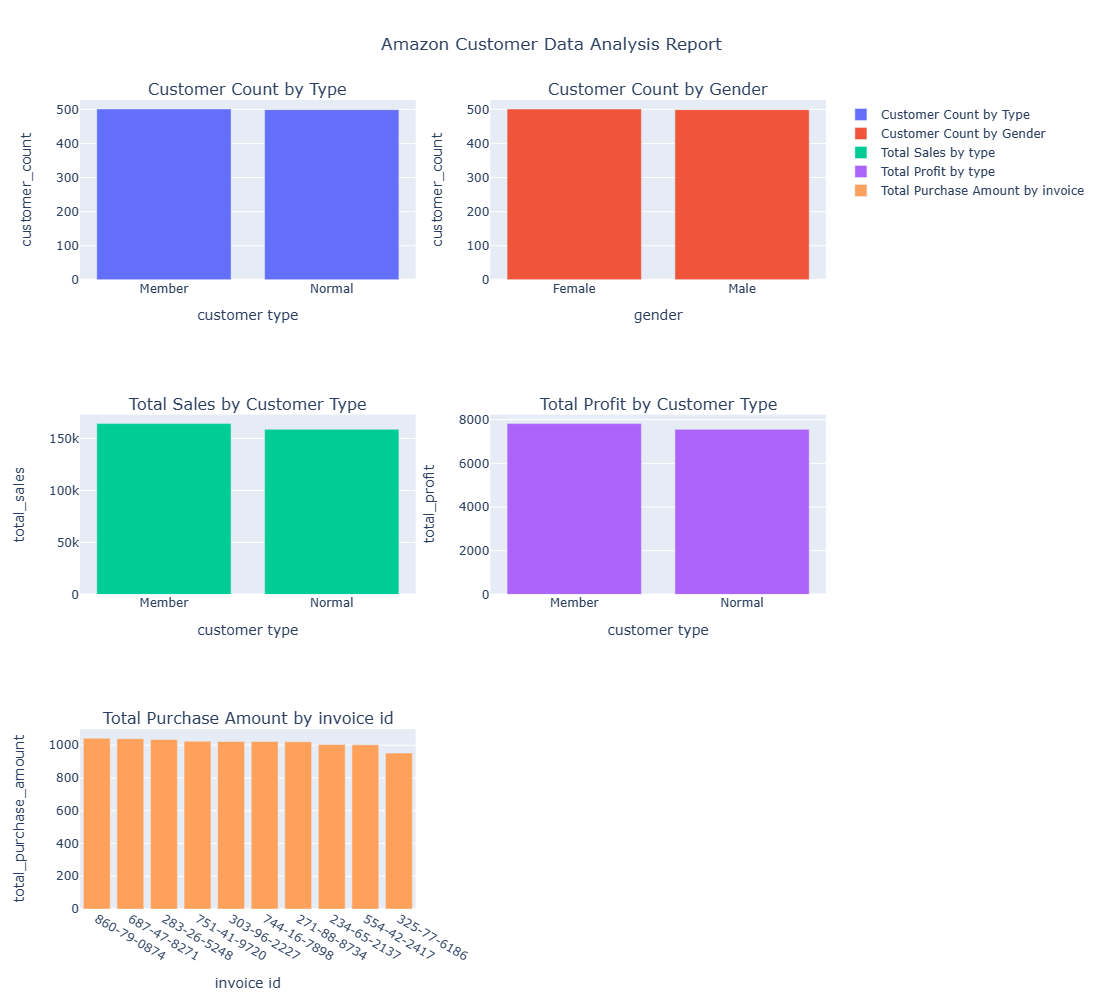

In [130]:
#Vidualizations by using plotly for customer analysis
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
# Define queries
q1="SELECT `customer type`, COUNT(*) AS customer_count FROM amazon GROUP BY `customer type`;"
q2="SELECT gender, COUNT(*) AS customer_count FROM amazon GROUP BY gender;"
q3="SELECT `customer type`, SUM(total) AS total_sales FROM amazon GROUP BY `customer type` ORDER BY total_sales DESC;"
q4="SELECT `customer type`, SUM(`gross income`) AS total_profit FROM amazon GROUP BY `customer type` ORDER BY total_profit DESC;"
q5="SELECT `invoice id`, SUM(total) AS total_purchase_amount FROM amazon GROUP BY `invoice id` ORDER BY total_purchase_amount DESC LIMIT 10;"
df1=pd.read_sql(q1,connection)
df2=pd.read_sql(q2,connection)
df3=pd.read_sql(q3,connection)
df4=pd.read_sql(q4,connection)
df5=pd.read_sql(q5,connection)

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Customer Count by Type", "Customer Count by Gender", 
                                                    "Total Sales by Customer Type", "Total Profit by Customer Type", 
                                                    "Total Purchase Amount by invoice id"))

# Bar Plot
bar_trace = go.Bar(x=df1['customer type'].unique(), y=df1['customer_count'])
fig.add_trace(go.Bar(x=df1['customer type'], y=df1['customer_count'], name="Customer Count by Type"), row=1, col=1)
fig.update_xaxes(title_text="customer type", row=1, col=1)
fig.update_yaxes(title_text="customer_count", row=1, col=1)

bar_trace = go.Bar(x=df2['gender'].unique(), y=df2['customer_count'])
fig.add_trace(go.Bar(x=df2['gender'], y=df2['customer_count'], name="Customer Count by Gender"), row=1, col=2)
fig.update_xaxes(title_text="gender", row=1, col=2)
fig.update_yaxes(title_text="customer_count", row=1, col=2)

bar_trace = go.Bar(x=df3['customer type'].unique(), y=df3['total_sales'])
fig.add_trace(go.Bar(x=df3['customer type'], y=df3['total_sales'], name="Total Sales by type"), row=2, col=1)
fig.update_xaxes(title_text="customer type", row=2, col=1)
fig.update_yaxes(title_text="total_sales", row=2, col=1)

bar_trace = go.Bar(x=df4['customer type'].unique(), y=df4['total_profit'])
fig.add_trace(go.Bar(x=df4['customer type'], y=df4['total_profit'], name="Total Profit by type"), row=2, col=2)
fig.update_xaxes(title_text="customer type", row=2, col=2)
fig.update_yaxes(title_text="total_profit", row=2, col=2)

bar_trace = go.Bar(x=df5['invoice id'].unique(), y=df5['total_purchase_amount'])
fig.add_trace(go.Bar(x=df5['invoice id'], y=df5['total_purchase_amount'], name="Total Purchase Amount by invoice"), row=3, col=1)
fig.update_xaxes(title_text="invoice id", row=3, col=1)
fig.update_yaxes(title_text="total_purchase_amount", row=3, col=1)

# Update layout

fig.update_layout(title="Amazon Customer Data Analysis Report", title_x=0.5,height=1000, width=1100)


# Show plot
fig.show()

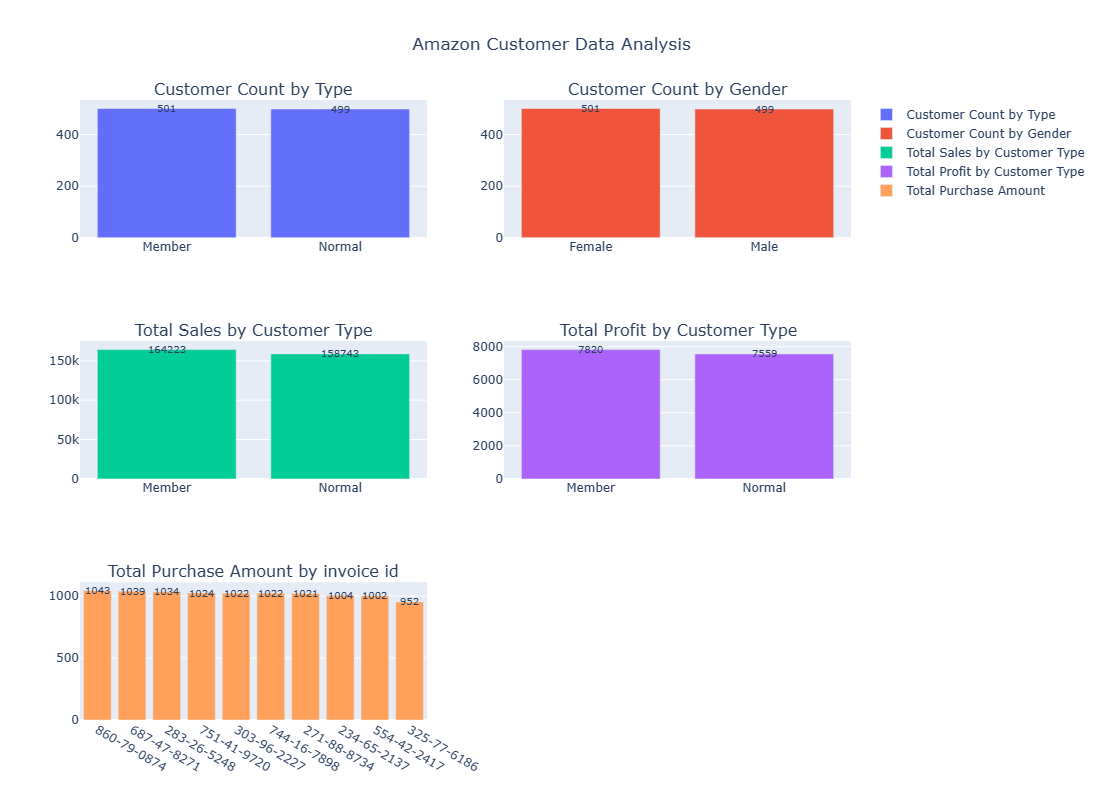

In [213]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Define queries
queries = [
    "SELECT `customer type`, COUNT(*) AS customer_count FROM amazon GROUP BY `customer type`;",
    "SELECT gender, COUNT(*) AS customer_count FROM amazon GROUP BY gender;",
    "SELECT `customer type`, SUM(total) AS total_sales FROM amazon GROUP BY `customer type` ORDER BY total_sales DESC;",
    "SELECT `customer type`, SUM(`gross income`) AS total_profit FROM amazon GROUP BY `customer type` ORDER BY total_profit DESC;",
    "SELECT `invoice id`, SUM(total) AS total_purchase_amount FROM amazon GROUP BY `invoice id` ORDER BY total_purchase_amount DESC LIMIT 10;"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Customer Count by Type", "Customer Count by Gender", "Total Sales by Customer Type", "Total Profit by Customer Type", "Total Purchase Amount by invoice id"))

# Execute queries, store results in DataFrames, and plot each query result in a separate subplot
for i, query in enumerate(queries, start=1):
    df = pd.read_sql(query, connection)
    
    try:
        x_label = df.columns[0]
        y_label = df.columns[1]
    except IndexError:
        print(f"Query {i} returned an empty result or columns are not as expected.")
        continue

    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1

    title = 'Customer Count by Type' if i == 1 else 'Customer Count by Gender' if i == 2 else 'Total Sales by Customer Type' if i == 3 else 'Total Profit by Customer Type' if i == 4 else 'Total Purchase Amount'

    fig.add_trace(go.Bar(x=df[x_label], y=df[y_label], name=title), row=row, col=col)

    # Annotate bars with values
    for x_val, y_val in zip(df[x_label], df[y_label]):
        fig.add_annotation(x=x_val, y=y_val, text=f'{y_val:.0f}', showarrow=False, font=dict(size=10), row=row, col=col)

fig.update_layout(height=800, title_x=0.5, title_text="Amazon Customer Data Analysis")
fig.show()
